## Machine learning o el arte de dejar que la compu que encuentre patrones en nuestros datos

### Mounting your google drive on Colab Noetebook


In [1]:
from google.colab import drive
## esto te va a pedir autorización. 
# Entra al link. Dale los permisos. Copiate el passw y pegalo acá donde te lo pide
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## remplazá 'unqml'
# por el nombre que le hayas puesto a esa carpeta en drive si usaste otro distinto
%cd drive/My Drive/unqml/ML_UNQ2020/ 



/content/drive/My Drive/unqml/ML_UNQ2020


In [3]:
#%cd ../

### Importamos los módulos que vamos a usar.

In [88]:
%matplotlib inline
import pandas as pd #Pandas para usar dataframes
import matplotlib.pyplot as plt #Para graficar
import matplotlib.cm as cm #Para graficar el silhouette
import seaborn as sns #Para graficar
import numpy as np #Para realizar operaciones númericas con matrices y arrays
from sklearn import datasets #sklearn es LA biblioteca de machine learning de python
from sklearn.cluster import KMeans, DBSCAN #Para usar kmeans
from sklearn.preprocessing import StandardScaler #Para estandarizar nuestros datos
from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
from sklearn.cluster import AgglomerativeClustering #Para clustering jerárquico
from sklearn.metrics import pairwise_distances #Para las distancias a pares
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage #Para graficar los dendrogramas y calcular el coeficiente cofenetico
from scipy.cluster import hierarchy #Para graficar los dendrogramas
from scipy.spatial.distance import pdist #Para calcular la distancia con el coeficiente cofenetico
import community as community_louvain #Para louvain
import networkx as nx #Para grafos


### Definimos la ruta a nuestros archivos de datos


In [5]:
datapath = './data/'

### Comencemos trabajando con un conjunto de datos: iris.
### Este conjunto de datos o dataset fue producido por R. A. Fisher y consta de 150 observaciones de distintas plantas. De cada planta se midieron algunas partes de la misma.
### Este dataset viene en un archivo de texto tabulado, es decir, las columnas están separadas por tabs



In [6]:
#pd hace referencia a la librería pandas, LA librería de python para trabajar con datos. La función read_csv permite leer un archivo tabulado.
iris = pd.read_csv(datapath + "iris/iris_hidden.txt", sep = '\t')



In [7]:

#Veamos qué tipo de objeto es iris
type(iris)

#Referencia del dataframe
#https://pandas.pydata.org/pandas-docs/stable/reference/frame.html


pandas.core.frame.DataFrame

In [8]:

#Veamos los nombres de las columnas que tiene
list(iris.columns)


['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

In [9]:

#Veamos qué tipo de datos tiene cada columna
list(iris.dtypes)


[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]

In [10]:

#Imprimamos las primeras y las últimas filas
print(iris.head())
print(iris.tail())


   sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
     sepal.length  sepal.width  petal.length  petal.width
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8


In [11]:

#Imprimamos una información general del dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [12]:
#El dataset viene con una descripción, leamosla más adelante
#!cat './data/iris/iris_description.txt'

### Realicemos un histograma y una estimación de la densidad de la variable petal.length para ver cómo es su distribución.




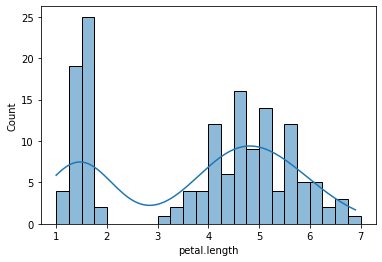

In [13]:
#sns es la librería seaborn que permite hacer unos gráficos muy bonitos en python
#https://seaborn.pydata.org/tutorial para un tutorial introductorio de cómo utilizarla
g = sns.histplot(data = iris, x = "petal.length", binwidth=0.25, kde = True)


### ¿Algo les llama la atención de la distribución de petal.length?

### Veamos el resto de las variables



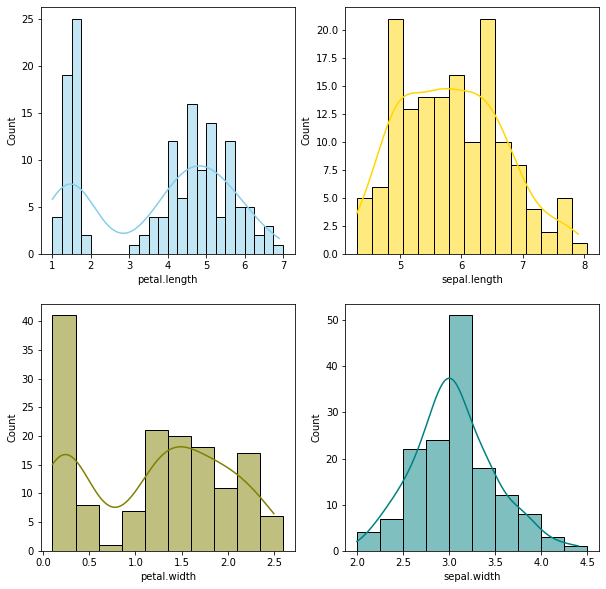

In [14]:
#Con seaborn podemos armar grillas de plots
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharex=False)
sns.histplot(data = iris, x = "petal.length", color="skyblue", binwidth=0.25, kde = True, ax=axes[0, 0])
sns.histplot(data = iris, x = "petal.width", color="olive", binwidth=0.25, kde = True, ax=axes[1, 0])
sns.histplot(data = iris, x = "sepal.length", color="gold", binwidth=0.25, kde = True, ax=axes[0, 1])
g = sns.histplot(data = iris, x = "sepal.width", color="teal", binwidth=0.25, kde = True, ax=axes[1, 1])

### Veamos qué tipo de relación hay entre ellas


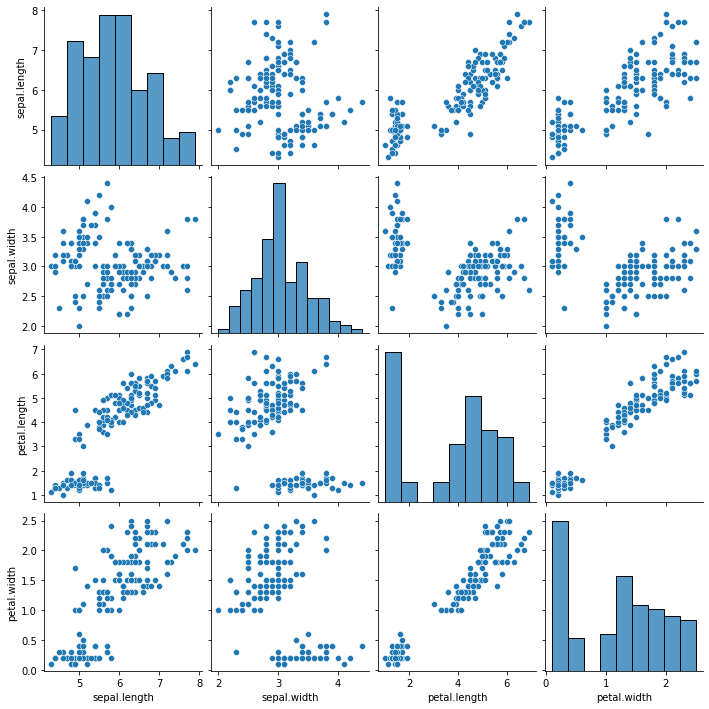

In [15]:
#Con pairplot podemos graficar las variables de a pares. También se llama a este tipo de gráficos correlogramas.
g = sns.pairplot(iris)

### ¿Qué problema tiene un scatter plot o gráfico de dispersión?

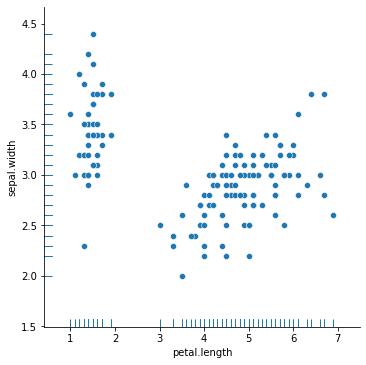

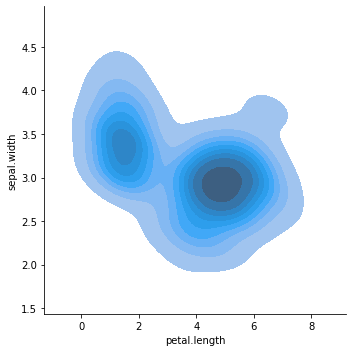

In [16]:
#Una forma de resolver ese problema es graficar los scatter junto a sus densidades. También podemos graficar las curvas de nivel o contornos.
sns.relplot(data=iris, x="petal.length", y="sepal.width")
sns.rugplot(data=iris, x="petal.length", y="sepal.width")
g = sns.displot(data=iris, x="petal.length", y="sepal.width", kind="kde", fill=True)

### Viendo todo esto, ¿cuántas especies de plantas midió Fisher? ¡No valen los spoilers!


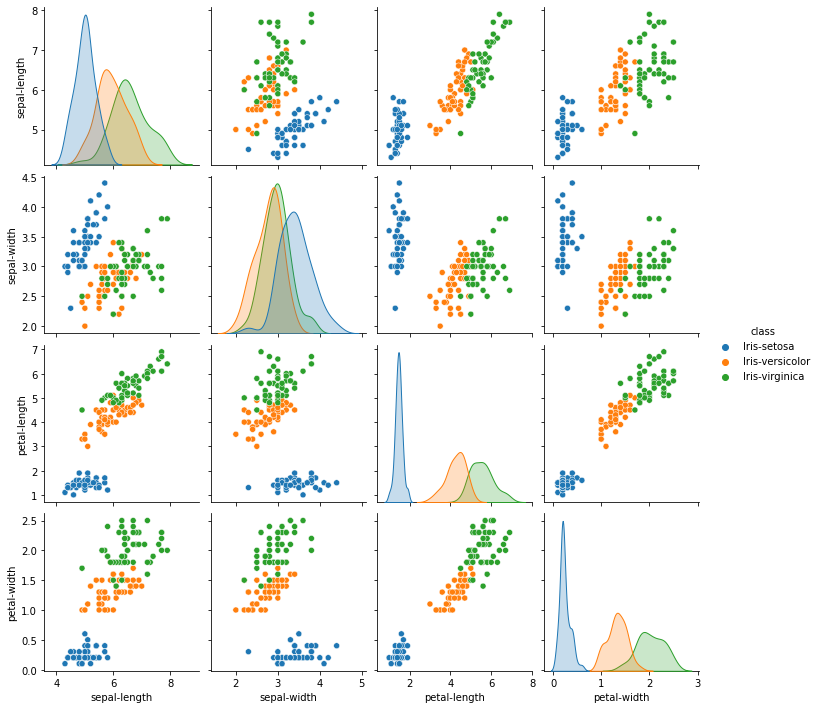

In [17]:
#Levantamos el dataset con las especies correspondientes y graficamos de a pares, con cada punto del color de la especie a la que pertenece.
iris_con_clases = pd.read_csv(datapath + "iris/iris.csv", sep = '\t')
g = sns.pairplot(iris_con_clases, hue="class")

### ¿Por qué se veía a simple viste que existían al menos dos grupos?


### Construyamos algunos ejemplos de juguete para entender mejor el problema.

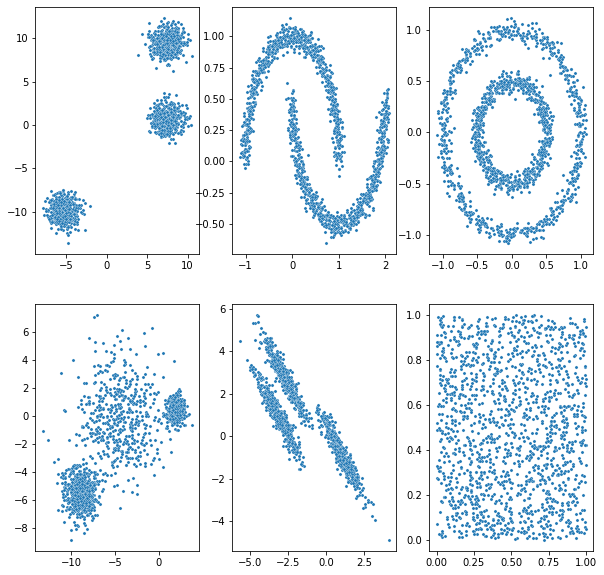

### ¿Qué pasaría con datasets de alta dimensionalidad? (O de dimensión mayor a 3, por lo menos)
### Exploremos la idea de agrupar por puntos cercanosy cómo podemos usarla para encontrar grupos o clusters compactos.
# El método K-Means


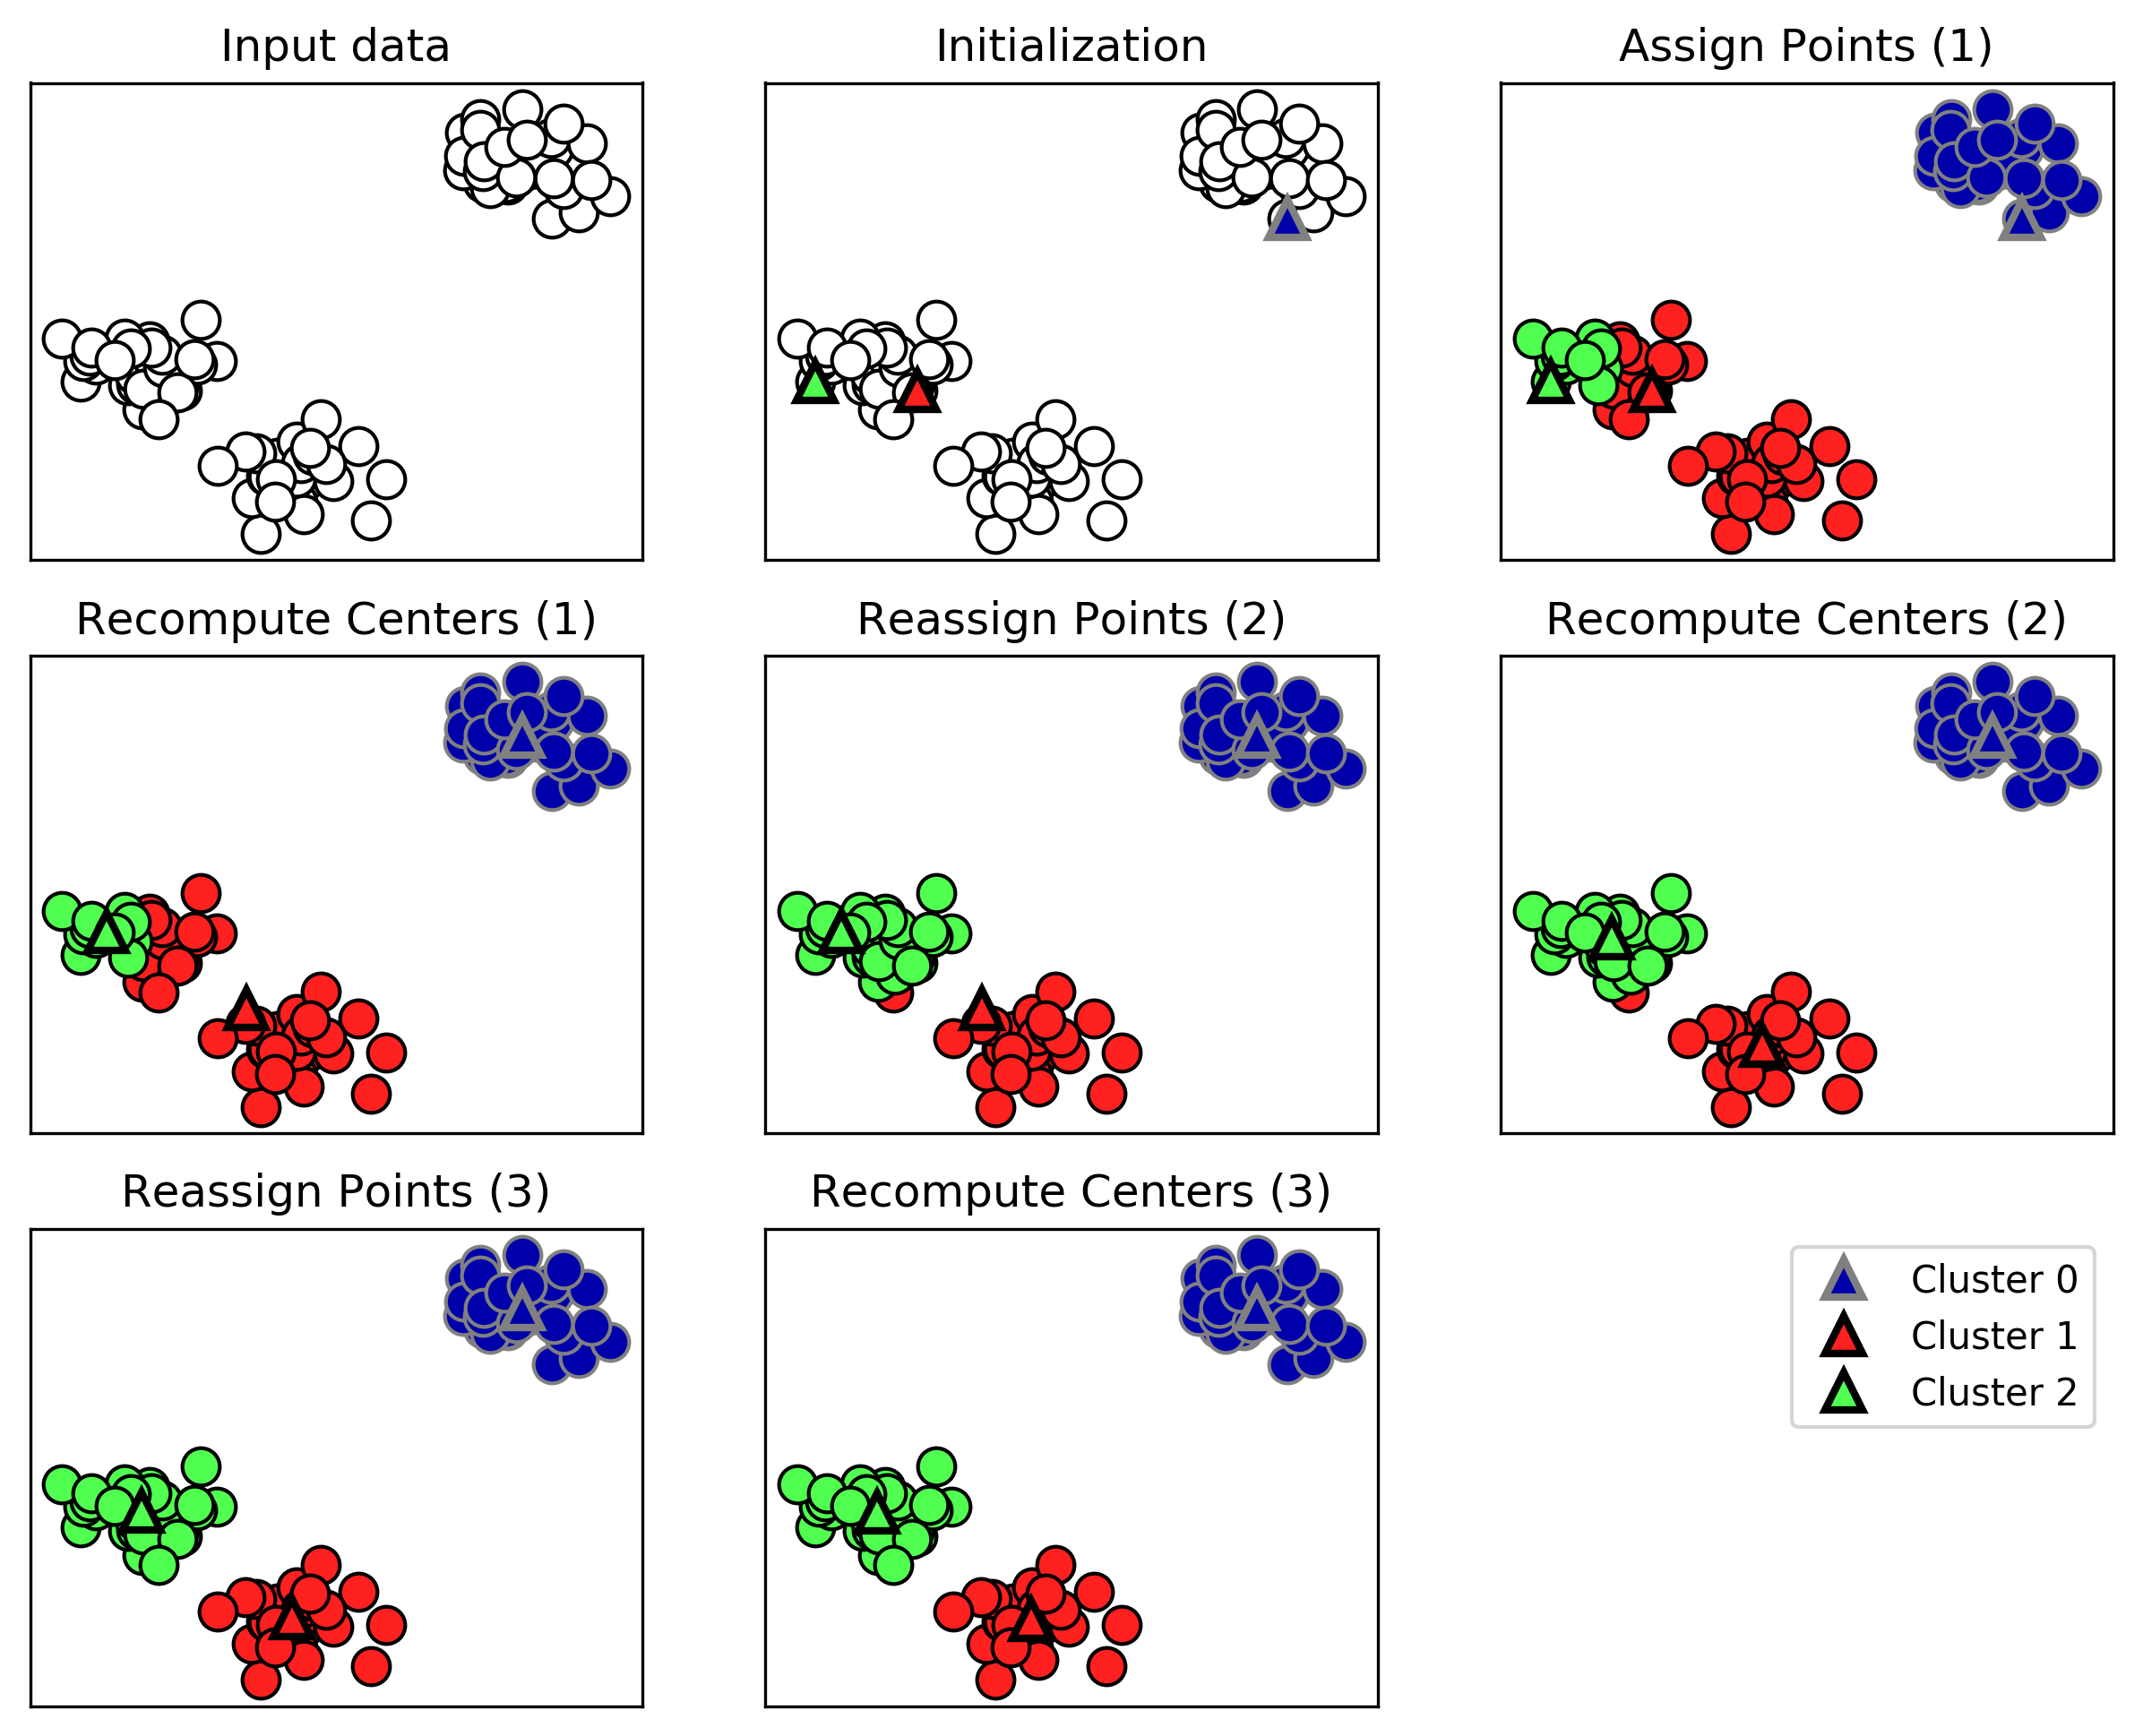

### Entonces, para correr K-means, necesitamos una noción de distancia y seleccionar la cantidad de clusters correcta. ¿Qué tipo de clusters estoy buscando?

### ¿Cómo calculo la distancia entre dos puntos? Pitágoras al rescate...

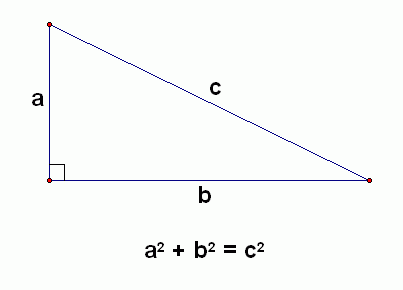
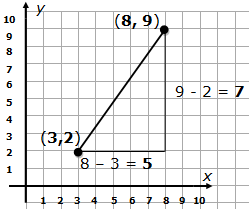

### En el caso de Iris, todos los atributos son medidas de longitud expresadas en cm. ¿Pero qué pasaría si tuviera atributos de otro tipo, por ejemplo, peso en gramos? ¿Puedo usar Pitágoras así nomás?

In [18]:
#Vamos a estandarizar nuestros datos para que todo tenga la medida de desvío estándar.
#Estandarizar centra los datos alrededor del cero y reescaléa en el sentido del desvío estandar. 
#Cada número ahora nos dice a cuántos desvíos de la media está ese punto.
scaler = StandardScaler() #Generamos un objeto de escalado
iris_escaleado = scaler.fit_transform(iris)


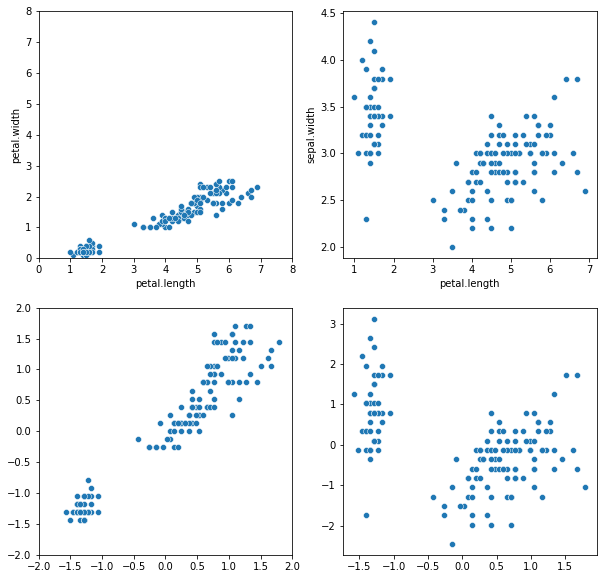

In [19]:
#Grafiquemos petal.length y sepal.width para la original y la transformada
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharex=False)
g = sns.scatterplot(data = iris, x = "petal.length", y = "petal.width", ax=axes[0, 0])
g.set(ylim=(0, 8), xlim = (0, 8))
g = sns.scatterplot(x = iris_escaleado[:,2], y = iris_escaleado[:, 3], ax=axes[1, 0])
g.set(ylim=(-2, 2), xlim = (-2, 2))
sns.scatterplot(data = iris, x = "petal.length", y = "sepal.width", ax=axes[0, 1])
g = sns.scatterplot(x = iris_escaleado[:,2], y = iris_escaleado[:, 1], ax=axes[1, 1])

In [20]:
#Apliquemos kmeans. Tenemos que elegir k, la cantidad de clusters
k = 3
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
kmeans.fit(iris_escaleado)
kmeans

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=123457,
       tol=0.0001, verbose=0)

In [21]:
#La asignación de cada punto a un cluster se obtiene de la propiedad labels_ del objeto clusters.
#Los centroides están en cluster_centers_
print(kmeans.labels_)
kmeans.cluster_centers_ 

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


array([[-0.05021989, -0.88029181,  0.34753171,  0.28206327],
       [ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862]])

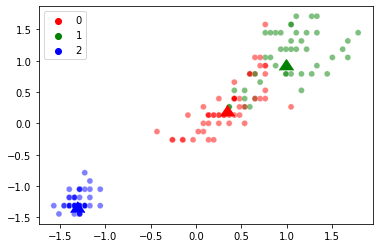

In [22]:
#Grafiquemos pintando del color etiquetado
colores = ["red", "green", "blue"]
g = sns.scatterplot(x = iris_escaleado[:,2], y = iris_escaleado[:, 3], hue = kmeans.labels_, palette = colores, alpha = 0.5)
g = sns.scatterplot(x = kmeans.cluster_centers_[:,2], y = kmeans.cluster_centers_[:,3], zorder = 10, palette = colores, hue = [0, 1, 2], legend = False, marker=6, s=200)

### ¿Qué onda todo esto? 

### ¿El K fue el correcto u otro hubiera funcionado mejor? ¿Funcionó bien? ¿Cómo podríamos medirlo?
### Podríamos hacer trampa y comparar con lo que ya conocemos...pero ¿qué especie corresponde con cada grupo? ¿Y si no tuvieramos las clases?


### Podemos usar alguna propiedad de los grupos que sea de interés y encontrar el k que la maximice (o minimice).
### En este caso, queremos encontrar grupos compactos, donde todos los elementos de un grupo estén lo más cerca posible de su centro. Podemos sumar las distancias de cada punto a su respectivo centro (SSE o suma de los cuadrados de los residuos) y usar eso como medida.

In [23]:
#El SSE de la mejor corrida es inertia_
kmeans.inertia_ #¿Este número es bajo? ¿Alto? ¿Cómo saberlo?

140.96581663074699

In [24]:
#Barramos un rango de k posible y veamos el mejor k
sse = [] #Generamos una lista vacía
for k in range(1, 11): #Probamos desde 1 cluster hasta 10
  kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
  kmeans.fit(iris_escaleado)
  sse.append(kmeans.inertia_) 

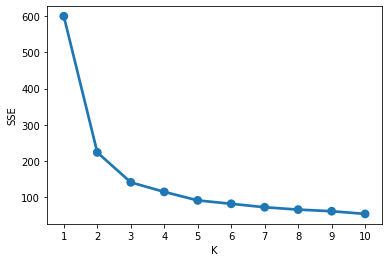

In [25]:
#Grafiquemos el sse en función del k
df = pd.DataFrame({'K':list(range(1, 11)), 'SSE':sse})
g = sns.pointplot(data = df, x = "K", y = "SSE")


### ¿Qué está pasando? ¿Por qué? 

## El criterio del CODO
### A medida que aumentamos K disminuye el SSE. Si tuvieramos 100 puntos y 100 clusters, el SSE llegaría a 0, pero no hay agrupación. Entonces buscamos un equilibrio entre un SSE bajo y la cantidad de clusters. Ese balance se consigue en el "codo", en donde un aumento en el K disminuye marginalmente el SSE. En este caso, K = 3 sería la mejor opción con este criterio (y también coincide con lo que sabíamos originalmente).

### El criterio del CODO es muy bueno para elegir el K cuando mis grupos son compactos. ¿Qué pasaría con el dataset de las dos lunas?


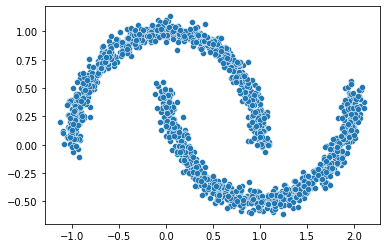

In [26]:
#Generamos el dataset de lunas
np.random.seed(123457) #Seteamos el generador de números pseudo aleatorios para poder reproducir los resultados
n_puntos = 1500 #Elegimos la cantidad de puntos
noisy_moons = datasets.make_moons(n_samples=n_puntos, noise=.05)[0] #Datos en forma de lunas
g = sns.scatterplot(data = noisy_moons, x = noisy_moons[:, 0], y = noisy_moons[:, 1]) #Graficamos 

### ¡EJERCICIO! Usar el método kmeans con el dataset de noisy_moons y decidir utilizando el criterio del codo cuántos clusters hay. Más abajo está el spoiler, intenten hacerlo ustedes en 15 minutos

In [27]:
# ----------------------- 

In [28]:
# -----------------------

In [29]:
#Primero hay que escalear!
scaler = StandardScaler() #Generamos un objeto de escalado
noisy_moons_escaleado = scaler.fit_transform(noisy_moons)
sse = [] #Generamos una lista vacía
for k in range(1, 11): #Probamos desde 1 cluster hasta 10
  kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
  kmeans.fit(noisy_moons_escaleado)
  sse.append(kmeans.inertia_) 

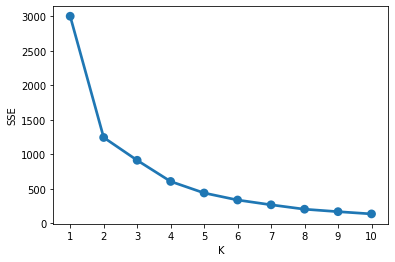

In [30]:
#Grafiquemos el sse en función del k
df = pd.DataFrame({'K':list(range(1, 11)),'SSE':sse})
#list(zip(, sse)), columns =['K', 'SSE'])
g = sns.pointplot(data = df, x = "K", y = "SSE")

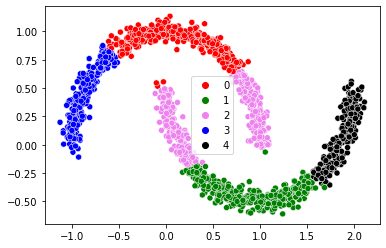

In [31]:
#Veamos qué dio
k = 5
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
kmeans.fit(noisy_moons_escaleado)
g = sns.scatterplot(data = noisy_moons, x = noisy_moons[:, 0], y = noisy_moons[:, 1], hue = kmeans.labels_, palette = ["red", "green", "violet", "blue", "black"]) #Graficamos 

### Antés de decir "esto no sirve para nada", hay que tener en cuenta que estamos buscando grupos compactos y que eso es lo que encontramos. Tener un conocimiento del dominio nos va a ayudar a pensar si esto tiene o no sentido en nuestro problema.


### Otra propiedad que nos puede interesar de una agrupación, es que todos los puntos de un grupo estén bien juntos y a la vez bien separados del resto de los puntos en otros grupos. Esta idea se puede encontrar en el COEFICIENTE DE SILHOUETTE, y nos dice para cada punto, si está cerca de su cluster y lejos del resto (coeficiente cercano a 1) o si está lejos de su cluster y cerca del resto (coeficiente cercano a -1).


In [32]:
# Usemos kmeans con iris para 3 grupos y calculemos el silhouette
k = 3
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
kmeans.fit(iris_escaleado)

#Traemos el promedio del silhouette de todos
silhouette_avg = silhouette_score(iris_escaleado, kmeans.labels_)
#Traemos el silhouette de cada punto
sample_silhouette_values = silhouette_samples(iris_escaleado, kmeans.labels_)

In [33]:
#Grafiquemos el silhouette. No se preocupen por el código, simplemente es una función para generar el gráfico!
def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([]) 


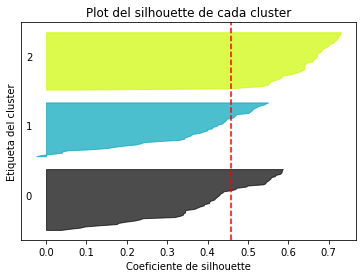

In [34]:
#Graficamos el silhouette
graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

### Hagamos lo mismo que hicimos para el criterio del codo pero con silhouette. Barramos la cantidad de clusters y veamos cuál agrupa mejor según este criterio.


In [35]:
#Barramos un rango de k posible y veamos el mejor k
silhouette_avg = [] #Generamos una lista vacía
for k in range(2, 11): #Probamos desde 2 clusters hasta 10. Silhouette no se puede calcular para un solo cluster
  kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
  kmeans.fit(iris_escaleado)
  silhouette_avg.append(silhouette_score(iris_escaleado, kmeans.labels_)) 

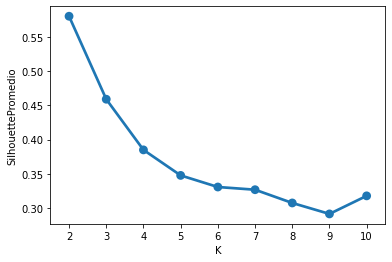

In [36]:
#Grafiquemos el silhouette en función del k
df = pd.DataFrame({'K':list(range(2, 11)), 'SilhouettePromedio':silhouette_avg})
g = sns.pointplot(data = df, x = "K", y = "SilhouettePromedio")

### ¿Qué k usaríamos con el criterio del silhouette?
### ¿Tiene sentido?

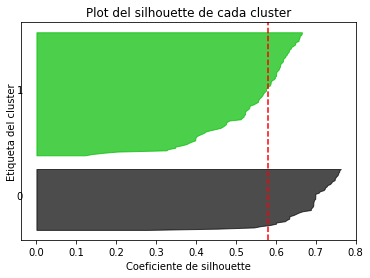

In [37]:
#Graficamos el silhouette
# Usemos kmeans con iris para 2 grupos y calculemos el silhouette
k = 2
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457 )
kmeans.fit(iris_escaleado)

#Traemos el promedio del silhouette de todos
silhouette_avg = silhouette_score(iris_escaleado, kmeans.labels_)
#Traemos el silhouette de cada punto
sample_silhouette_values = silhouette_samples(iris_escaleado, kmeans.labels_)
graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

### 20 Minutos de recreo y seguimos

### Veamos otra forma de pensar los clusters. En lugar de dividir todas las observaciones en grupos, vayamos agregando las observaciones en grupos cada vez más grandes hasta juntarlas todas en un único grupo.
## Agrupamiento jerárquico aglomerativo

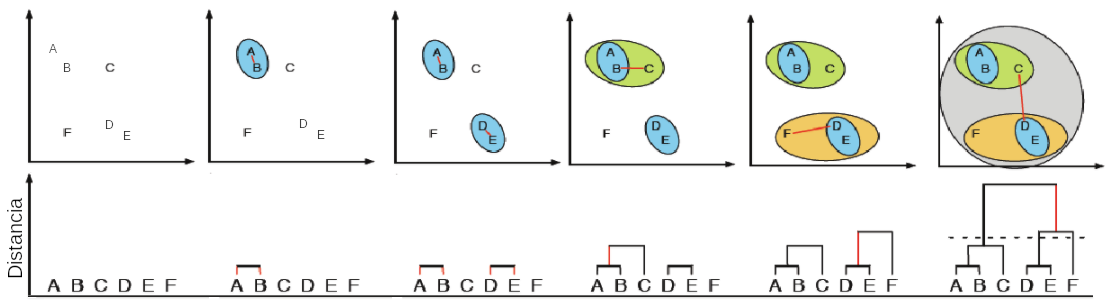

### ¿Qué necesitamos decidir para poder construir los grupos?
1 - La medida de distancia a utilizar (Euclideana, manhattan, coseno)   
2 - ¿A qué altura cortamos?  
3 - Cuando unimos dos grupos, ¿cuál es la nueva distancia entre el resto de los grupos y ese grupo? (Single linkage, Complete linkage, Average linkage, Ward)  


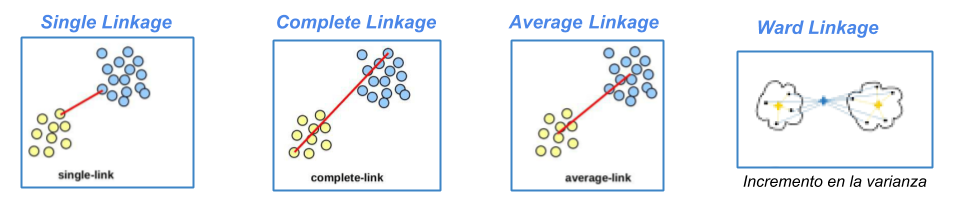

Text(0.5, 1.0, 'Correlación')

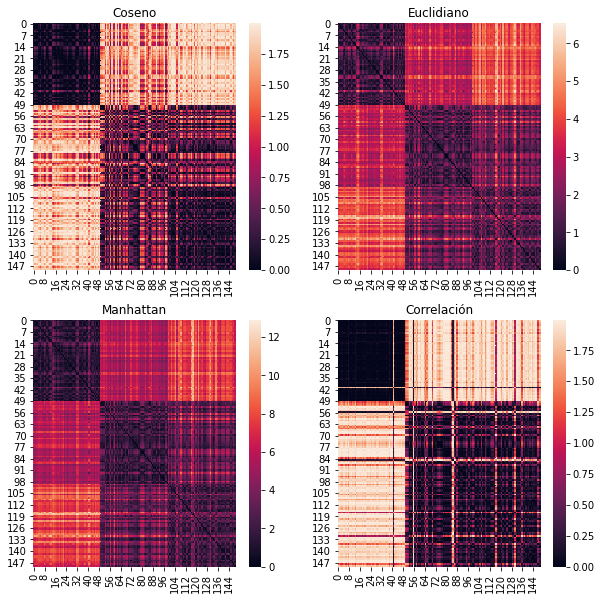

In [38]:
#Probemos con distintas distancias a ver qué encontramos
#metricstr or function, optional
#The distance metric to use. The distance function can be ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’.
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharex=False)
distancias = pairwise_distances(iris_escaleado, iris_escaleado, metric="cosine")
ax = sns.heatmap(distancias, ax = axes[0, 0])
ax.set_title('Coseno')
distancias = pairwise_distances(iris_escaleado, iris_escaleado, metric="euclidean")
ax = sns.heatmap(distancias, ax = axes[0, 1])
ax.set_title('Euclidiano')
distancias = pairwise_distances(iris_escaleado, iris_escaleado, metric="cityblock")
ax = sns.heatmap(distancias, ax = axes[1, 0])
ax.set_title('Manhattan')
distancias = pairwise_distances(iris_escaleado, iris_escaleado, metric="correlation")
ax = sns.heatmap(distancias, ax = axes[1, 1])
ax.set_title('Correlación')

Text(0.5, 1.0, 'Average')

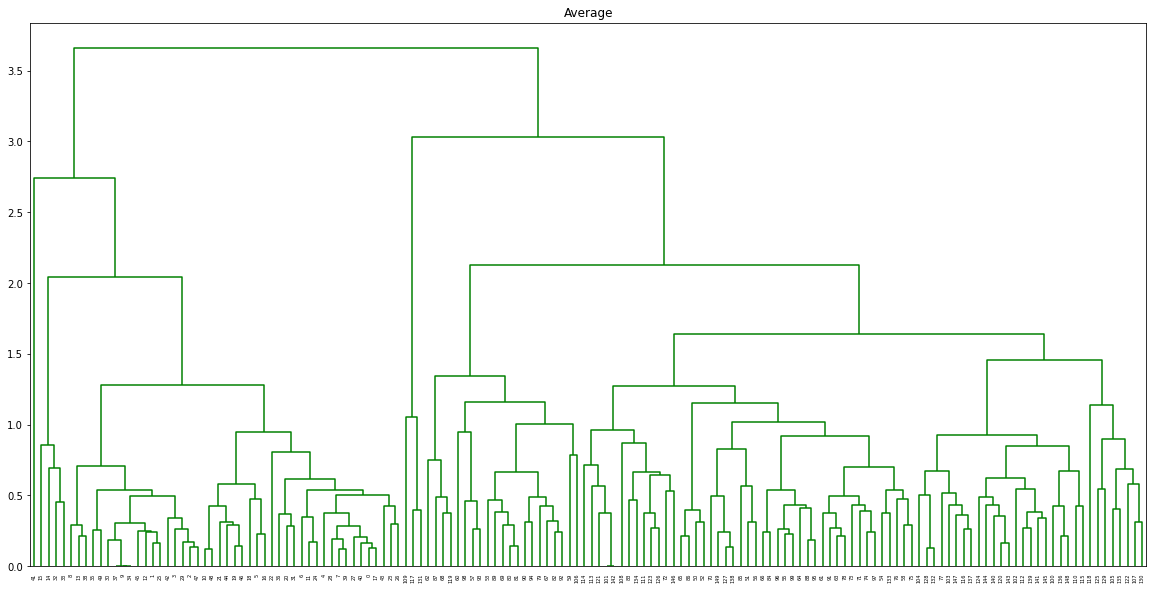

In [53]:
#Grafiquemos. Como sklearn no tiene para graficar dendrogramas, usamos scipy
Z = linkage(iris_escaleado, 'average', metric="euclidean")
plt.figure(figsize=(20,10))
dn = dendrogram(Z,  color_threshold=10000) #El threshold ayuda en la visualización pero puede confundir también, lo sacamos
plt.title("Average")

### ¿Por dónde cortamos el árbol? Pero antes, ¿Qué hubiera pasado si en lugar de average usabamos complete, single o ward?


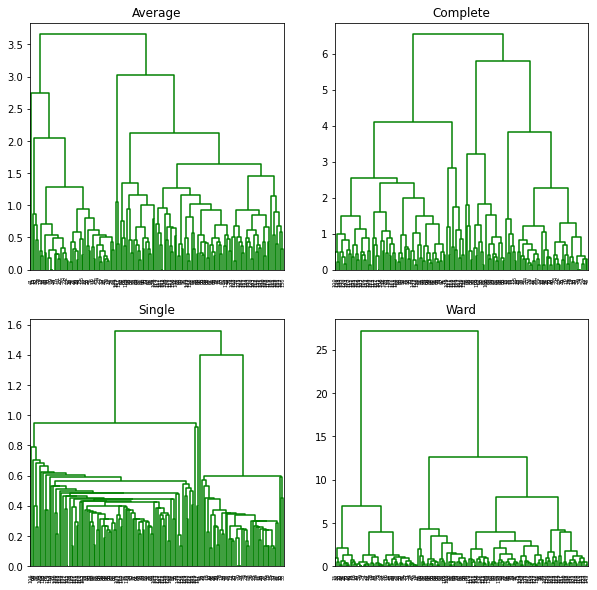

In [62]:
#Grafiquemos los dendrogramas hechos con la misma medida de distancia pero con distinto linkage.
ccc = [] # Vamos a aprovechar y calcular el coeficiente de correlación cofenética. Un poco más sobre eso más adelante
d = pdist(iris_escaleado, metric = "euclidean") #Calculamos la matriz de distancia
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharex=False)

Z = linkage(iris_escaleado, 'average', metric = "euclidean")
dn = dendrogram(Z,  color_threshold=10000, ax = axes[0, 0])
axes[0, 0].set_title("Average")
ccc.append(cophenet(Z, d)[0])

Z = linkage(iris_escaleado, 'complete', metric = "euclidean")
dn = dendrogram(Z,  color_threshold=10000, ax = axes[0, 1])
axes[0, 1].set_title("Complete")
ccc.append(cophenet(Z, d)[0])

Z = linkage(iris_escaleado, 'single', metric = "euclidean")
dn = dendrogram(Z,  color_threshold=10000, ax = axes[1, 0]) 
axes[1, 0].set_title("Single")
ccc.append(cophenet(Z, d)[0])

Z = linkage(iris_escaleado, 'ward', metric = "euclidean")
dn = dendrogram(Z,  color_threshold=10000, ax = axes[1, 1])
axes[1, 1].set_title("Ward")
ccc.append(cophenet(Z, d)[0])


### Una forma de comparar estas 4 agrupaciones es con el coeficiente cofenético. Este coeficiente compara las distancias originales entre los puntos con las distancias que aparecen en el agrupamiento. Cosas que estaban cerca en nuestro espacio original deberían aparecer cerca en el agrupamiento y cosas que estaban lejos en el espacio original deberían aparecer lejos en el agrupamiento.

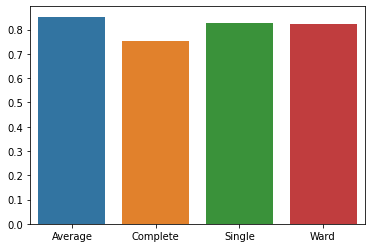

In [63]:
ax = sns.barplot(x=["Average", "Complete", "Single", "Ward"], y=ccc)


In [64]:
#Usemos Average y cortemos en 3.2
#La función de sklearn es AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=3.2, n_clusters=None, linkage="average", affinity="euclidean") 
model.fit(iris_escaleado)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=3.2,
                        linkage='average', memory=None, n_clusters=None)

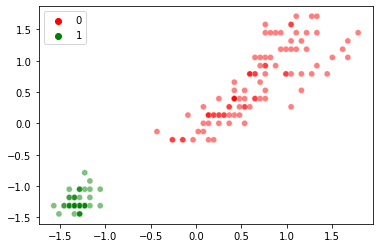

In [67]:
#Grafiquemos el resultado
colores = ["red", "green"]
g = sns.scatterplot(x = iris_escaleado[:,2], y = iris_escaleado[:, 3], hue = model.labels_, palette = colores, alpha = 0.5)

### Ejercicio: Elegir otra medida y realizar clustering jerárquico sobre los mismos datos.  ¿Cuál es el linkage que mejor respeta las distancias originales?¿Cuántos clusters obtienen?

### Existen muchos otros métodos de agrupamiento utilizando otras propiedades. Para mostrarles algunos, dbscan utiliza densidad, clustering espectral usa los autovalores de la matriz de similitud y louvain detecta comunidades en grafos.

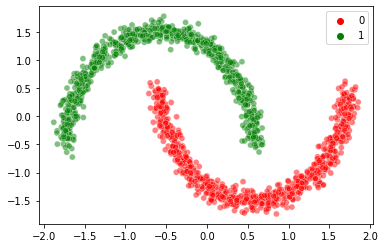

In [89]:
#Veamos cómo le va a dbscan con las lunas
db = DBSCAN(eps=0.2, min_samples=3).fit(noisy_moons_escaleado)
colores = ["red", "green"]
g = sns.scatterplot(x = noisy_moons_escaleado[:, 0], y = noisy_moons_escaleado[:, 1], hue = db.labels_, palette = colores, alpha = 0.5)

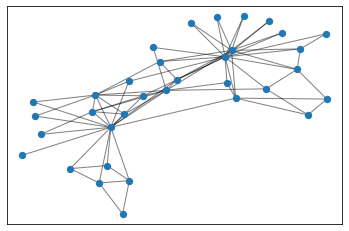

In [93]:
#Usamos el club de karate de zachary como ejemplo
G = nx.karate_club_graph() #Generamos el grafo

#Graficamos
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, 
                       cmap=cmap)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

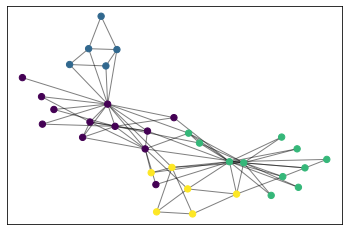

In [94]:
#Generamos la partición
partition = community_louvain.best_partition(G)

#Graficamos con la particion
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, 
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


### Algunos ejercicios para practicar:
### Analizar los datasets que se encuentran en la carpeta data/animales en busca de clusters. Utilizar las herramientas de kmeans y clustering jerárquico. ¿Es posible darle un sentido a los clusters encontrados?


### Apéndice de gráficos

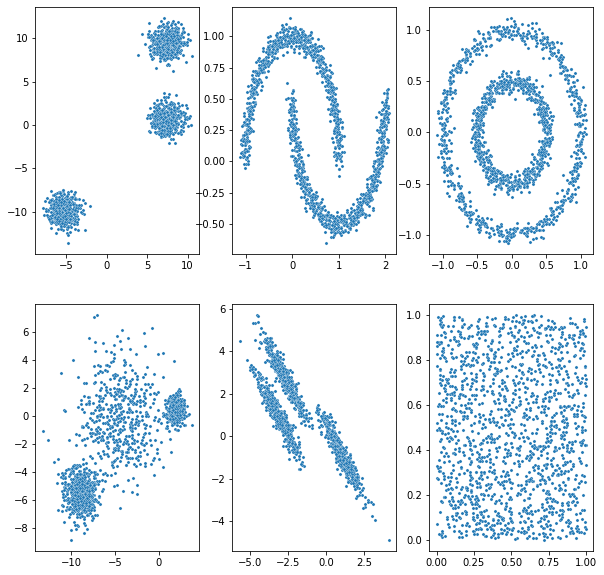

In [ ]:
#Generamos datos de juguete. El código de esta celda no es importante, no lo sigan porque se van a perder!!!

#Generamos datos al azar con distintas distribuciones. 
np.random.seed(0)
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05) #Datos en forma de círculo
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05) #Datos en forma de lunas
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8) #Datos en forma de manchas
no_structure = np.random.rand(n_samples, 2), None  #Datos sin estructura
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)  #Datos con distintos tamaños dependiendo el eje
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)  #Datos en forma de mancha con tamaño variable

#Graficamos los conjuntos de datos que inventamos
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10, 10), sharex=False)
X, y = noisy_circles
sns.scatterplot(x = X[:, 0], y = X[:, 1], s=10, ax = axes[0, 2])
X, y = noisy_moons
sns.scatterplot(x = X[:, 0], y = X[:, 1], s=10, ax = axes[0, 1])
X, y = blobs
sns.scatterplot(x = X[:, 0], y = X[:, 1], s=10, ax = axes[0, 0])
X, y = no_structure
g = sns.scatterplot(x = X[:, 0], y = X[:, 1], s=10, ax = axes[1, 2])
X, y = aniso
g = sns.scatterplot(x = X[:, 0], y = X[:, 1], s=10, ax = axes[1, 1])
X, y = varied
g = sns.scatterplot(x = X[:, 0], y = X[:, 1], s=10, ax = axes[1, 0])

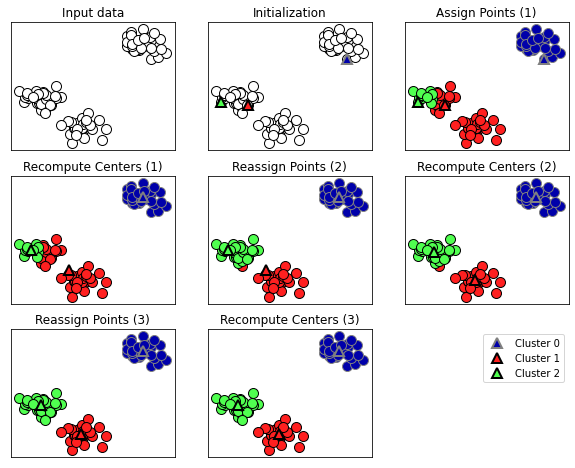

In [ ]:
#Instalamos mglearn
#!pip install mglearn #Sacar el # del principio para correr esta linea en caso de no tener instalado mglearn
import mglearn
mglearn.plots.plot_kmeans_algorithm()


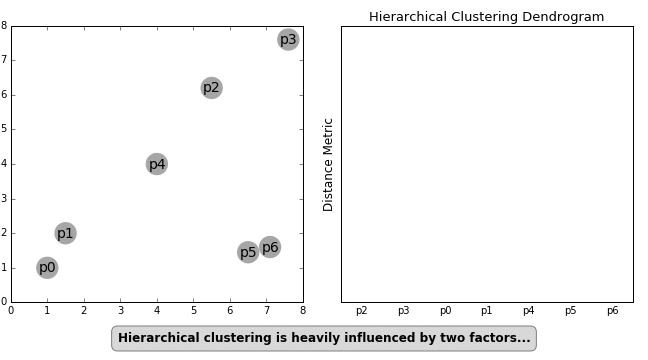

Sacado de: https://towardsdatascience.com/hierarchical-clustering-in-python-using-dendrogram-and-cophenetic-correlation-8d41a08f7eab